# <span style='background :yellow' > Exercise 5.1</span>

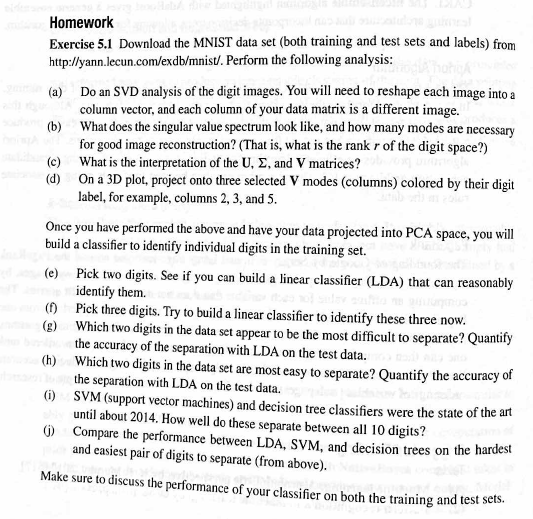

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


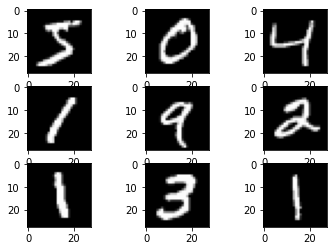

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.optimize import minimize
from matplotlib import rcParams
from sklearn import linear_model
from keras.datasets import mnist

#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
 
#plotting
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))

### <span style='background :pink' > (a). Do an SVD analysis of the digit images. You will need to reshape each image into a column vector and each column of your data matrix is a different image.</span>

In [2]:
X_train=np.reshape(train_X,(28*28,60000))
U, S, VT = np.linalg.svd(X_train-np.mean(X_train),full_matrices=0)

### <span style='background :pink' > (b). What does the singular value spectrum look like and how many modes are necessary for good image reconstruction? (That is, what is the rank r of the digit space?)</span>

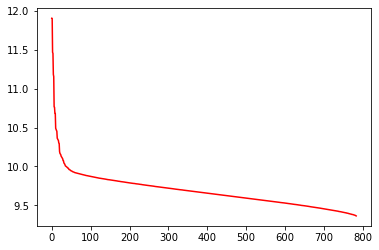

In [3]:
plt.plot(np.arange(len(S)), np.log(S), color='red')

In [4]:
# This function num(X, min) counts the number of elements greater than min in the array X.
def num(X,min):
    l=len(X)
    number=0
    for i in range(l):
        if X[i]>min:
            number += 1
        else:
            number = number

    return number

In [5]:
r=num(np.log(S),10)
r

38

### <span style='background :pink' > (c). What is the interpretation of the $U$, $\Sigma$, and $V$ matrices?</span>

In [6]:
U.shape

(784, 784)

In [7]:
VT.shape

(784, 60000)

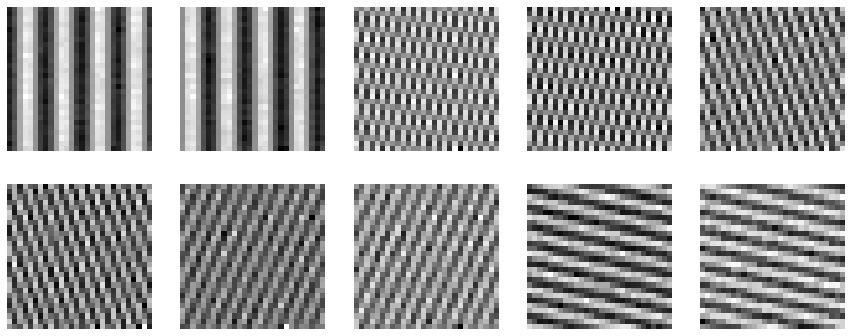

In [8]:
# Visualize the results from U
plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.reshape(U[:,i],(28,28)), cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.show()

The column of the matrix U provide an orthonormal basis for the column space of X_train - mean(X_train); the column of the matrix V provide the coordinates for each column of X_train - mean(X_train); each element in $\Sigma$  represents the importance of the corresponding base.

### <span style='background :pink' > (d). On a 3D plot, project onto three selected V-modes (columns) colored by their digit label. For example, columns 2,3, and 5.</span>

In [11]:
def label(x):
    if x == 0:
        ax.scatter(x,y,z,marker='o',color='b',s=50)
    elif x == 1:
        ax.scatter(x,y,z,marker='o',color='g',s=50)
    elif x == 2:
        ax.scatter(x,y,z,marker='o',color='r',s=50)
    elif x == 3:
        ax.scatter(x,y,z,marker='o',color='c',s=50)
    elif x == 4:
        ax.scatter(x,y,z,marker='o',color='m',s=50)
    elif x == 5:
        ax.scatter(x,y,z,marker='o',color='y',s=50)
    elif x == 6:
        ax.scatter(x,y,z,marker='o',color='k',s=50)
    elif x == 7:
        ax.scatter(x,y,z,marker='o',color='purple',s=50)
    elif x == 8:
        ax.scatter(x,y,z,marker='o',color='chartreuse',s=50)
    elif x == 9:
        ax.scatter(x,y,z,marker='o',color='sienna',s=50)

In [13]:
V=VT.T

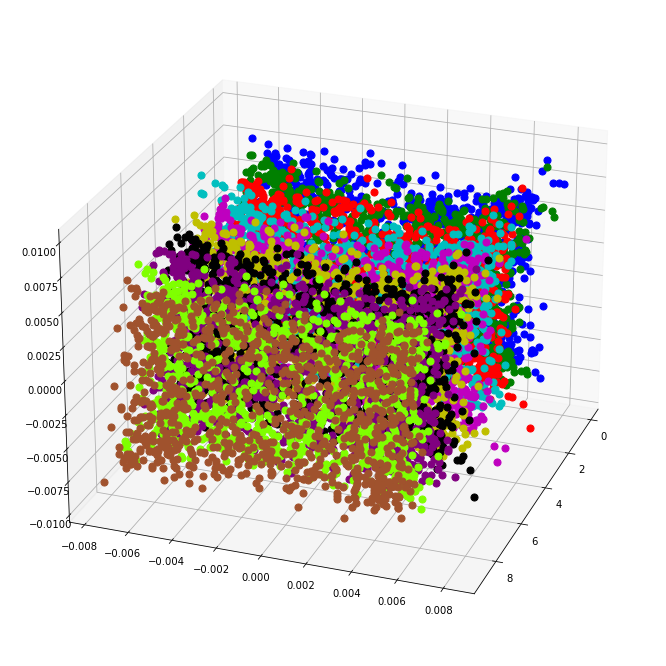

In [14]:
fig4 = plt.figure(figsize=(20,12))
ax = fig4.add_subplot(111, projection='3d')
for j in range(10000):
    x = V[j,1]
    y = V[j,2]
    z = V[j,4]
    label(train_y[j])
ax.view_init(25,20)
plt.show()

# <span style='background :pink' > Once you have performed the above and have your data projected into PCA space,you will build a classifier to identify individual digits in the training set.</span>

### <span style='background :pink' > (e). Pick two digits (0 and 6). See if you can build a linear classifier (LDA) that can reasonable identify them.</span>

In [15]:
# The function digit() is to find the index of a specific digit set.

def digit(data_set, label_set,label):
    k=0
    for i in range(len(label_set)):
        if label_set[i]==label:
            k += 1
        else:
            k = k
            
    data_index=np.zeros(k)
    
    w=0
    for j in range(len(label_set)):
        if label_set[j]==label:
            data_index[w]=j
            w += 1
        else:
            w = w
            
    data_new = np.zeros((784,k))    
    data_new = data_set[:,data_index.astype(int)]
    
    return data_index.astype(int), data_new, k

In [16]:
X_test =np.reshape(test_X,(28*28,10000))
Train_X=np.reshape(train_X,(train_X.shape[0],28*28))
Test_X=np.reshape(test_X,(test_X.shape[0],28*28))

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
index0=digit(X_train, train_y,0)[0]
index1=digit(X_train, train_y,6)[0]
xtrain = np.concatenate((Train_X[index0,:],Train_X[index1,:]))
label_train = np.append(train_y[index0],train_y[index1])

lda = LinearDiscriminantAnalysis()
lda_train = lda.fit(xtrain, label_train)

index0_t=digit(X_test, test_y,0)[0]
index1_t=digit(X_test, test_y,6)[0]

test01=np.concatenate((Test_X[index0_t,:],Test_X[index1_t,:]))
test_class = lda_train.predict(test01)
truth = np.append(test_y[index0_t],test_y[index1_t])
print('Accuracy :', np.count_nonzero(test_class==truth)/len(truth))

Accuracy : 0.9876160990712074


### <span style='background :pink' > (f). Pick three digits (0, 6 and 1). Try to build a linear classifier to identify these three now.</span>

In [18]:
index0=digit(X_train, train_y,0)[0]
index1=digit(X_train, train_y,6)[0]
index2=digit(X_train, train_y,1)[0]

xtrain012 = np.concatenate((Train_X[index0,:],Train_X[index1,:],Train_X[index2,:]))
label_train012 = np.append(np.append(train_y[index0],train_y[index1]), train_y[index2])


lda012 = LinearDiscriminantAnalysis()
lda_train012 = lda012.fit(xtrain012, label_train012)

index0_t=digit(X_test, test_y,0)[0]
index1_t=digit(X_test, test_y,6)[0]
index2_t=digit(X_test, test_y,1)[0]
test012=np.concatenate((Test_X[index0_t,:],Test_X[index1_t,:],Test_X[index2_t,:]))
test_class012 = lda_train012.predict(test012)
truth012 = np.append(np.append(test_y[index0_t],test_y[index1_t]),test_y[index2_t])

print('Accuracy :', np.count_nonzero(test_class012==truth012)/len(truth012))

Accuracy : 0.9866579889358933


### <span style='background :pink' > [SVM]   Pick two digits (0 and 6). See if you can build a SVM that can reasonable identify them.</span>

In [19]:
from sklearn import svm

index0=digit(X_train, train_y,0)[0]
index1=digit(X_train, train_y,6)[0]

xtrain_svm = np.concatenate((Train_X[index0,:],Train_X[index1,:]))
label_train_svm= np.append(train_y[index0],train_y[index1])


Mdl = svm.SVC(kernel='linear',gamma=0.0001).fit(xtrain_svm,label_train)

index0_t=digit(X_test, test_y,0)[0]
index1_t=digit(X_test, test_y,6)[0]
test01svm=np.concatenate((Test_X[index0_t,:],Test_X[index1_t,:]))
test_class_svm = Mdl.predict(test01svm)
truth_svm = np.append(test_y[index0_t],test_y[index1_t])

print('Accuracy :', np.count_nonzero(test_class_svm==truth_svm)/len(truth_svm))

Accuracy : 0.9840041279669762


### <span style='background :pink' > [Decision trees]  Pick two digits (0 and 6). See if you can build this decision trees that can reasonable identify them.</span>

In [20]:
from sklearn import tree, preprocessing
from sklearn import svm

index0=digit(X_train, train_y,0)[0]
index1=digit(X_train, train_y,6)[0]


xtrain_tree = np.concatenate((Train_X[index0,:],Train_X[index1,:]))
label_train_tree= np.append(train_y[index0],train_y[index1])


Mdl_tree = tree.DecisionTreeClassifier(max_depth=2).fit(xtrain,label_train)

index0_t=digit(X_test, test_y,0)[0]
index1_t=digit(X_test, test_y,6)[0]
test01tree=np.concatenate((Test_X[index0_t,:],Test_X[index1_t,:]))
test_class_tree = Mdl_tree.predict(test01svm)
truth_tree= np.append(test_y[index0_t],test_y[index1_t])

print('Accuracy :', np.count_nonzero(test_class_tree==truth_tree)/len(truth_tree))

Accuracy : 0.9489164086687306
